<a href="https://colab.research.google.com/github/VitikaJain25/HealthCareNLPCourse/blob/main/ANN_Classification_Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/VitikaJain25/MLDataSets/main/diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Manipulation

In [3]:
# All data is numerical
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diabetes.describe()
# Problem is Glucose, BP, Insulin cannot be 0.
# Outcome = 0 mean person is not diabetic, 1 means person is diabetic.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Dropping Pregnancies column as it can be zero. Other columns cannot be zero.
data_raw = diabetes.drop(['Pregnancies', 'Outcome'], axis = 1)

In [6]:
# Other columns cannot be zero, so replacing 0 by np.nan to find missing values.
data_raw.replace(0, np.nan, inplace = True)

In [7]:
# Calculating the missing values.
data_raw.isnull().sum().sort_values(ascending=False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

## Handeling Missing Values

In [8]:
# If data is continous, replace by Mean.
# If data is discrete, replace by Median.
# If data is non-numerical, replace by Mode.

# Using unique() to find out the type of values (continous, discrete)
data_raw['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [9]:
np.round(data_raw['Insulin'].mean())

156.0

In [10]:
# Replace Missing values with Mean for "Insulin" column.
# Replacing nan value with Mean value for the column "Insulin".
data_raw['Insulin'].replace(np.nan, np.round(data_raw['Insulin'].mean()), inplace = True)

In [11]:
# Verfying the values for Insulin column.
data_raw.isnull().sum().sort_values(ascending=False)

# Insuline column now has 0 missing / nan values.

SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Insulin                       0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

## Imputer





*  If we want to remove missing or nan values from multiple columns, then instead of doing it one by one we can use Imputer
*   The data type changes from Dataframe to Array.
*   Simple Imputer targets only nan values that is why we converted 0 values to nan values before replacing with mean value.
*   If we do not want to use an imputer, then we can directly convert the 0 values to mean value (no need to convert to nan)







In [12]:
# The Data type changes from Dataframe to Array.
from sklearn.impute import SimpleImputer
# Strategy = 'median', 'mean', 'mode'
impute = SimpleImputer(strategy = 'median')
data_array = impute.fit_transform(data_raw)

In [13]:
data_array

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [14]:
# So we have to convert the array back to a Dataframe.
diabetes_df = pd.DataFrame(data_array, columns = data_raw.columns)
diabetes_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0


In [15]:
diabetes_df['Pregnancies'] = diabetes.Pregnancies
diabetes_df['Outcome'] = diabetes.Outcome

Data Augmentation

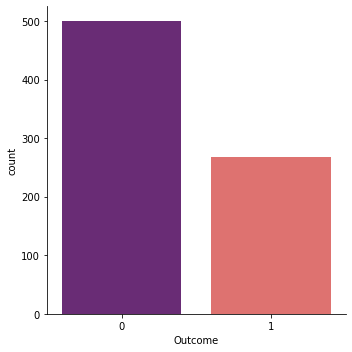

In [16]:
sns.catplot(x = "Outcome", kind = "count", data = diabetes_df, palette = 'magma')

# Output class is not balanced.

In [17]:
# Imbalanced class
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [18]:
# Random Oversampling 
# Resample using "bootstrapping" method to generate samples by upsampling for each class
from sklearn.utils import resample
df_0 = diabetes_df[diabetes_df['Outcome'] == 0]
df_1 = diabetes_df[diabetes_df['Outcome'] == 1]

In [19]:
# Apply Resampling
# Upsampling
df_1_upsample = resample(df_1, n_samples = 500, replace = True, random_state = 123)

In [20]:
diabetes_df1 = pd.concat([df_0, df_1_upsample])

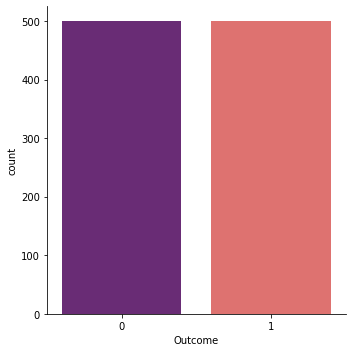

In [21]:
sns.catplot(x = "Outcome", kind = "count", data = diabetes_df1, palette = 'magma')

## Split Train and Test

In [22]:
X = diabetes_df1.drop(['Outcome'], axis = 1)
Y = diabetes_df1['Outcome']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

## ANN Classification

In [24]:
# Dropout is used to handle issue like overfitting.
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
# Optimizers
from tensorflow.keras.optimizers import Adam

In [25]:
def build_model():
  # Sequential Neural Network - FeedForward Neural Network
  # Randomly have to choose the units value.
  # We can give different combination of values for the units value. We can write a function and start a loop. At end we will know whcih 
  #combination of values are giving the best accuracy.

  model = Sequential()
  # Units = Num of Neurons (2 * pow(n)), input shape = Num of Features.
  model.add(Dense(units = 64, activation = 'relu', input_shape = [len(X.keys())]))
  
  # Hidden layer - 1
  model.add(Dense(units = 128, activation = 'relu'))

  # Hidden layer - 2
  model.add(Dense(units = 128, activation = 'relu'))

  # Output Layer - For Classification
  model.add(Dense(units = 1, activation = 'sigmoid'))

  # Optimizers
  optimizers = Adam(learning_rate=0.001)

  # Model Compiler
  model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])

  return model

  # Without Dropout

In [26]:
model = build_model()

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,537
Trainable params: 25,537
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Epochs = Number of Iterations
# epochs are choosen randomly. If accuracy is low, try increasing the epochs.
# Batch size - no of samples per iteration.

history = model.fit(x_train, y_train, epochs = 500, batch_size = 25, validation_split = 0.15)

Epoch 1/500
28/28 [==============================] - 1s 26ms/step - loss: 1.1647 - accuracy: 0.5926 - val_loss: 0.6329 - val_accuracy: 0.6750
Epoch 2/500
28/28 [==============================] - 0s 7ms/step - loss: 0.7421 - accuracy: 0.6235 - val_loss: 0.6524 - val_accuracy: 0.6750
Epoch 3/500
28/28 [==============================] - 0s 6ms/step - loss: 0.6163 - accuracy: 0.6853 - val_loss: 0.6773 - val_accuracy: 0.6583
Epoch 4/500
28/28 [==============================] - 0s 6ms/step - loss: 0.8001 - accuracy: 0.6279 - val_loss: 0.7431 - val_accuracy: 0.6583
Epoch 5/500
28/28 [==============================] - 0s 8ms/step - loss: 0.7887 - accuracy: 0.6574 - val_loss: 0.6689 - val_accuracy: 0.6500
Epoch 6/500
28/28 [==============================] - 0s 6ms/step - loss: 0.7489 - accuracy: 0.6750 - val_loss: 0.5262 - val_accuracy: 0.7500
Epoch 7/500
28/28 [==============================] - 0s 5ms/step - loss: 0.6468 - accuracy: 0.6750 - val_loss: 0.7707 - val_accuracy: 0.5833
Epoch 8/500


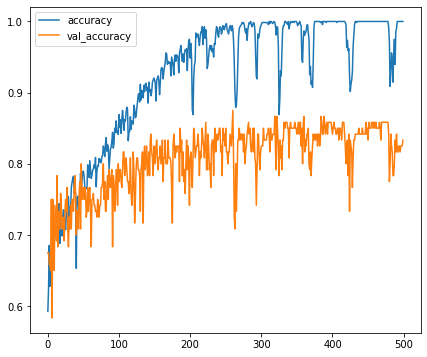

In [29]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize = (7,6))

In [30]:
# Accuracy is 1 for training and less than 80 for test samples. This is Overfitting.
# We want to use some techniques to overcome overfitting
# Technique :1 - Using Dropout.

In [31]:
# With Dropout

def build_model():
  # Sequential Neural Network - FeedForward Neural Network
  # Randomly have to choose the units value.
  # We can give different combination of values for the units value. We can write a function and start a loop. At end we will know whcih 
  #combination of values are giving the best accuracy.

  model = Sequential()
  # Units = Num of Neurons (2 * pow(n)), input shape = Num of Features.
  model.add(Dense(units = 64, activation = 'relu', input_shape = [len(X.keys())]))
  model.add(Dropout(0.2))
  
  # Hidden layer - 1
  model.add(Dense(units = 128, activation = 'relu'))
  model.add(Dropout(0.2))

  # Hidden layer - 2
  model.add(Dense(units = 128, activation = 'relu'))
  model.add(Dropout(0.2))

  # Output Layer - For Classification
  model.add(Dense(units = 1, activation = 'sigmoid'))

  # Optimizers
  optimizers = Adam(learning_rate=0.001)

  # Model Compiler
  model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])

  return model

In [32]:
model = build_model()

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [34]:
# Epochs = Number of Iterations
# batch_size = number of samples per iteration

history = model.fit(x_train, y_train, epochs = 500, batch_size = 25, validation_split=0.15)

Epoch 1/500
28/28 [==============================] - 1s 9ms/step - loss: 4.2778 - accuracy: 0.5691 - val_loss: 1.0616 - val_accuracy: 0.5917
Epoch 2/500
28/28 [==============================] - 0s 3ms/step - loss: 2.7948 - accuracy: 0.5544 - val_loss: 0.9276 - val_accuracy: 0.5750
Epoch 3/500
28/28 [==============================] - 0s 4ms/step - loss: 1.5766 - accuracy: 0.5544 - val_loss: 0.5900 - val_accuracy: 0.6583
Epoch 4/500
28/28 [==============================] - 0s 4ms/step - loss: 1.4765 - accuracy: 0.5412 - val_loss: 0.6441 - val_accuracy: 0.6250
Epoch 5/500
28/28 [==============================] - 0s 4ms/step - loss: 1.3571 - accuracy: 0.5456 - val_loss: 0.6362 - val_accuracy: 0.6333
Epoch 6/500
28/28 [==============================] - 0s 4ms/step - loss: 0.9693 - accuracy: 0.5897 - val_loss: 0.5543 - val_accuracy: 0.6333
Epoch 7/500
28/28 [==============================] - 0s 3ms/step - loss: 0.9371 - accuracy: 0.6118 - val_loss: 0.5776 - val_accuracy: 0.6417
Epoch 8/500
2

In [35]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,4.277759,0.569118,1.061603,0.591667
1,2.794776,0.554412,0.927574,0.575000
2,1.576603,0.554412,0.589969,0.658333
3,1.476493,0.541176,0.644137,0.625000
4,1.357081,0.545588,0.636195,0.633333
...,...,...,...,...
495,0.300030,0.866176,0.596220,0.808333
496,0.310560,0.870588,0.507766,0.816667
497,0.315367,0.864706,0.619277,0.783333
498,0.310553,0.854412,0.569738,0.808333


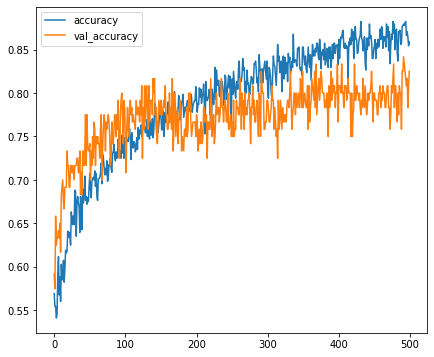

In [36]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(figsize = (7,6))

In [37]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.7987 - accuracy: 0.7650


[0.7987205386161804, 0.7649999856948853]

## Classification Metrics

In [38]:
predict = model.predict(x_test)

In [39]:
yhat = np.round(predict)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        98
           1       0.78      0.75      0.77       102

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200



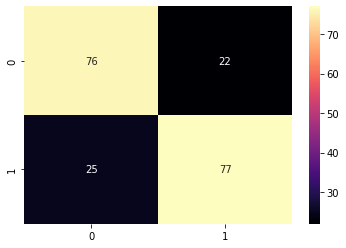

In [41]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, yhat), annot = True, fmt = '0.0f', cmap = 'magma')